AUTHOR - MBANEFO BENEDICT

TASK  -  PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NO. OF STUDY HOURS.

In [1]:
#Importing libraries required for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#to make our plots appear in the notebook
%matplotlib inline 


In [2]:
#Import data drom the already provided link and pass into a DataFrame

url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
score_data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#little more exploration on the dataset

score_data.info()
score_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# As part of exploration, we have to visualize our dataset to find any data points

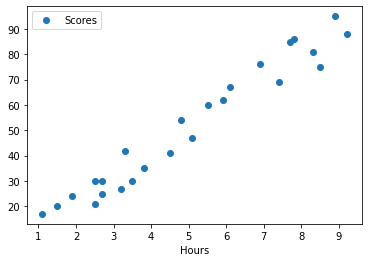

In [4]:
score_data.plot(x= "Hours", y= "Scores", style="o")
plt.title = ("Hours vs Percentage Score")
plt.xlabel = ("Hours Studied")
plt.ylabel= ("Percentage Score")
plt.show();

In [5]:
# Here we split the data into our feature and target column
X = score_data.iloc[:, :-1].values  
y = score_data.iloc[:, 1].values  

In [6]:
#Splitting the dataset into train and test data

#first we import the train_test_split model
from sklearn.model_selection import train_test_split  


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 0) 
 

In [7]:
# Instantiate the LinearRegressor model and fit 

model = LinearRegression()

#fit the model
model.fit(X_train,y_train)

LinearRegression()

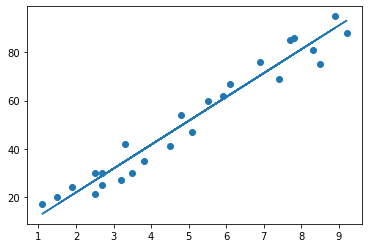

In [8]:
#Plotting the regression line and the test data
line = model.coef_*X+model.intercept_

plt.scatter(X,y)
plt.plot(X, line)
plt.show()



In [9]:
#Making Predictions
y_pred = model.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
#Comparing the Actual and Predicted 

df= pd.DataFrame(
    {
        "Actual": y_test,
        "Predcited": model.predict(X_test)
    }

)
df.head()

,Actual,Predcited
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the prediction score if the student studies for 9.25 hours per day?

In [12]:
sample_hours = 9.25
prediction_score = model.predict(np.array([sample_hours]).reshape(1,1))
print("No of Hours = {}".format(sample_hours))
print("Prediction Score= {}".format(prediction_score[0]))

No of Hours = 9.25
Prediction Score= 93.69173248737539


# Evaluate the model performance

In [13]:

test_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Test MAE:", round(test_mae, 2))

Test MAE: 4.18
